### Objective
* Demonstrate how Random Forest model is applied to predict monthly number of sunsports
* Evaluate the accuracy of the model

### Workflow
1. import sunspots data
2. add feature variables
3. fit the default Random Forest regressor
4. fit the RF regressor with hyperparameter tunning
5. generate predictive plot of sunspots per month
6. test out different normal distributions and check out where they fit
7. test out uniform distribution for the n_estimators
8. fit the RandomizedSearchCV with normal and uniform distributions
9. Obtain the feature importances from the RF

In [1]:
# step-1 => import sunspots data

import pandas as pd
data = pd.read_csv('5Sunspots.csv')
data = data.iloc[:,[1,2]]

In [2]:
# step-2 => add features Year and Month for seasonality and lagged versions of the target variable for the past 
# 12 months

# Seasonality variables
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)

# Adding a year of lagged data
data['L1'] = data['Monthly Mean Total Sunspot Number'].shift(1)
data['L2'] = data['Monthly Mean Total Sunspot Number'].shift(2)
data['L3'] = data['Monthly Mean Total Sunspot Number'].shift(3)
data['L4'] = data['Monthly Mean Total Sunspot Number'].shift(4)
data['L5'] = data['Monthly Mean Total Sunspot Number'].shift(5)
data['L6'] = data['Monthly Mean Total Sunspot Number'].shift(6)
data['L7'] = data['Monthly Mean Total Sunspot Number'].shift(7)
data['L8'] = data['Monthly Mean Total Sunspot Number'].shift(8)
data['L9'] = data['Monthly Mean Total Sunspot Number'].shift(9)
data['L10'] = data['Monthly Mean Total Sunspot Number'].shift(10)
data['L11'] = data['Monthly Mean Total Sunspot Number'].shift(11)
data['L12'] = data['Monthly Mean Total Sunspot Number'].shift(12)

In [3]:
# step-3 => do a train-test split. Fit the RF regressor with default hyperparameters.

# Create X and y object
data = data.dropna()
y = data['Monthly Mean Total Sunspot Number']
X = data[['Year', 'Month', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12']]

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
my_rf = RandomForestRegressor()
my_rf.fit(X_train, y_train)
fcst = my_rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(list(y_test), list(fcst))

0.8619985562677913

In [4]:
# step-4 => optimise the RF regressor using a grid search hyperparameter tuning

from sklearn.model_selection import GridSearchCV

my_rf = GridSearchCV(RandomForestRegressor(), 
                 {'max_features':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                 'n_estimators': [10, 50, 100, 250, 500, 750, 1000]},
                scoring = 'r2', n_jobs = -1)

my_rf.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)

0.8678419526807534
{'max_features': 0.75, 'n_estimators': 1000}


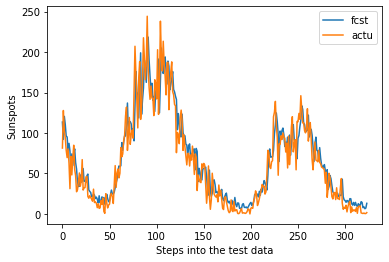

In [5]:
# step-5 => generate the plot of the forecast (sunspots per month) on the test set

import matplotlib.pyplot as plt
plt.plot(list(fcst))
plt.plot(list(y_test))
plt.legend(['fcst', 'actu'])
plt.ylabel('Sunspots')
plt.xlabel('Steps into the test data')
plt.show()

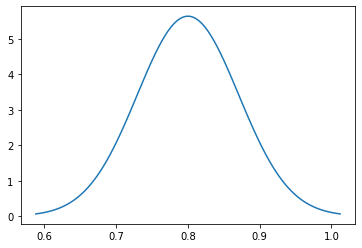

In [6]:
# step-6 => test out a normal distribution for the max_features 

import numpy as np
import scipy.stats as stats
import math

mu = 0.8
variance = 0.005
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

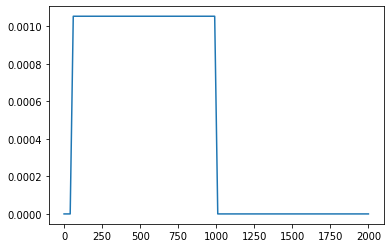

In [7]:
# step-7 => test out a uniform distribution for the n_estimators

x = np.linspace(0, 2000, 100)
plt.plot(x, stats.uniform.pdf(x, 50, 950))
plt.show()

In [8]:
# step-8 => fit the RandomizedSearchCV with two distributions 

from sklearn.model_selection import RandomizedSearchCV

# Specifying the distributions to draw from
distributions = {
    'max_features': stats.norm(0.8, math.sqrt(0.005)),
    'n_estimators': stats.randint(50, 1000)
}

# Creating the search
my_rf = RandomizedSearchCV(RandomForestRegressor(),
                           
                     distributions, n_iter=10,
                          scoring = 'r2',
                          n_jobs = -1,
                          random_state = 12345)

# Fitting the search
my_rf.fit(X_train, y_train)

# Printing the results
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)

0.86862242362968
{'max_features': 0.7024759740118218, 'n_estimators': 819}


In [9]:
# step-9 => get the feature importances from the RF 

fi = pd.DataFrame({
        'feature': X_train.columns,
        'importance': my_rf.best_estimator_.feature_importances_})

fi.sort_values('importance', ascending=False)

,feature,importance
2,L1,0.584368
3,L2,0.212727
4,L3,0.072226
5,L4,0.031193
6,L5,0.014401
7,L6,0.012325
10,L9,0.010286
12,L11,0.010085
11,L10,0.009543
9,L8,0.009490
